## Feature Importance

In [2]:
from sklearn.model_selection import train_test_split
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import sem
from scipy.stats import t

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Wind\*.nc", parallel=True)

In [3]:
rain = np.array(data_rain['rainfall'])
winter_rain = rain[3::4]
summer_rain = rain[5::4]
spring_rain = rain[4::4]
autumn_rain = rain[6::4]
hurs = np.array(data_hurs['hurs'])
winter_hurs = hurs[3::4]
summer_hurs = hurs[5::4]
spring_hurs = hurs[4::4]
autumn_hurs = hurs[6::4]
temp = np.array(data_temp['tas'])
winter_temp = temp[3::4]
summer_temp = temp[5::4]
spring_temp = temp[4::4]
autumn_temp = temp[6::4]
temp_max = np.array(data_tmax['tasmax'])
winter_tmax = temp_max[3::4]
summer_tmax = temp_max[5::4]
spring_tmax = temp_max[4::4]
autumn_tmax = temp_max[6::4]
temp_min = np.array(data_tmin['tasmin'])
winter_tmin = temp_min[3::4]
summer_tmin = temp_min[5::4]
spring_tmin = temp_min[4::4]
autumn_tmin = temp_min[6::4]
sun = np.array(data_sun['sun'])
winter_sun = sun[3::4]
summer_sun = sun[5::4]
spring_sun = sun[4::4]
autumn_sun = sun[6::4]
frost = np.array(data_frost['groundfrost'])
winter_frost = frost[3::4]
summer_frost = frost[5::4]
spring_frost = frost[4::4]
autumn_frost = frost[6::4]
psl = np.array(data_psl['psl'])
winter_psl = psl[3::4]
summer_psl = psl[5::4]
spring_psl = psl[4::4]
autumn_psl = psl[6::4]
wind = np.array(data_wind['sfcWind'])
winter_wind = wind[3::4]
summer_wind = wind[5::4]
spring_wind = wind[4::4]
autumn_wind = wind[6::4]

In [4]:
temp_reduced = block_reduce(temp, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp))
tmax_reduced = block_reduce(temp_max, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_max))
tmin_reduced = block_reduce(temp_min, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_min))
rain_reduced = block_reduce(rain, block_size=(4, 1, 1), func=np.mean, cval=np.mean(rain))
hurs_reduced = block_reduce(hurs, block_size=(4, 1, 1), func=np.mean, cval=np.mean(hurs))
sun_reduced = block_reduce(sun, block_size=(4, 1, 1), func=np.mean, cval=np.mean(sun))
frost_reduced = block_reduce(frost, block_size=(4, 1, 1), func=np.mean, cval=np.mean(frost))
psl_reduced = block_reduce(psl, block_size=(4, 1, 1), func=np.mean, cval=np.mean(psl))
wind_reduced = block_reduce(wind, block_size=(4, 1, 1), func=np.mean, cval=np.mean(wind))

In [5]:
min_length = len(autumn_wind)
rain_reduced = rain_reduced[:min_length]
hurs_reduced = hurs_reduced[:min_length]
temp_reduced = temp_reduced[:min_length]
tmax_reduced = tmax_reduced[:min_length]
tmin_reduced = tmin_reduced[:min_length]
sun_reduced = sun_reduced[:min_length]
frost_reduced = frost_reduced[:min_length]
wind_reduced = wind_reduced[:min_length]
psl_reduced = psl_reduced[:min_length]
winter_rain = winter_rain[:min_length]
summer_rain = summer_rain[:min_length]
spring_rain = spring_rain[:min_length]
autumn_rain = autumn_rain[:min_length]
winter_hurs = winter_hurs[:min_length]
summer_hurs = summer_hurs[:min_length]
spring_hurs = spring_hurs[:min_length]
autumn_hurs = autumn_hurs[:min_length]
winter_temp = winter_temp[:min_length]
summer_temp = summer_temp[:min_length]
spring_temp = spring_temp[:min_length]
autumn_temp = autumn_temp[:min_length]
winter_tmax = winter_tmax[:min_length]
summer_tmax = summer_tmax[:min_length]
spring_tmax = spring_tmax[:min_length]
autumn_tmax = autumn_tmax[:min_length]
winter_tmin = winter_tmin[:min_length]
summer_tmin = summer_tmin[:min_length]
spring_tmin = spring_tmin[:min_length]
autumn_tmin = autumn_tmin[:min_length]
winter_sun = winter_sun[:min_length]
summer_sun = summer_sun[:min_length]
spring_sun = spring_sun[:min_length]
autumn_sun = autumn_sun[:min_length]
winter_frost = winter_frost[:min_length]
summer_frost = summer_frost[:min_length]
spring_frost = spring_frost[:min_length]
autumn_frost = autumn_frost[:min_length]
winter_psl = winter_psl[:min_length]
summer_psl = summer_psl[:min_length]
spring_psl = spring_psl[:min_length]
autumn_psl = autumn_psl[:min_length]
winter_wind = winter_wind[:min_length]
summer_wind = summer_wind[:min_length]
spring_wind = spring_wind[:min_length]
autumn_wind = autumn_wind[:min_length]

In [6]:
scaler = MinMaxScaler()

rain_reduced = scaler.fit_transform(rain_reduced.reshape(-1, 1)).flatten()
hurs_reduced = scaler.fit_transform(hurs_reduced.reshape(-1, 1)).flatten()
temp_reduced = scaler.fit_transform(temp_reduced.reshape(-1, 1)).flatten()
tmax_reduced = scaler.fit_transform(tmax_reduced.reshape(-1, 1)).flatten()
tmin_reduced = scaler.fit_transform(tmin_reduced.reshape(-1, 1)).flatten()
sun_reduced = scaler.fit_transform(sun_reduced.reshape(-1, 1)).flatten()
frost_reduced = scaler.fit_transform(frost_reduced.reshape(-1, 1)).flatten()
wind_reduced = scaler.fit_transform(wind_reduced.reshape(-1, 1)).flatten()
psl_reduced = scaler.fit_transform(psl_reduced.reshape(-1, 1)).flatten()
winter_rain = scaler.fit_transform(winter_rain.reshape(-1, 1)).flatten()
summer_rain = scaler.fit_transform(summer_rain.reshape(-1, 1)).flatten()
spring_rain = scaler.fit_transform(spring_rain.reshape(-1, 1)).flatten()
autumn_rain = scaler.fit_transform(autumn_rain.reshape(-1, 1)).flatten()
winter_hurs = scaler.fit_transform(winter_hurs.reshape(-1, 1)).flatten()
summer_hurs = scaler.fit_transform(summer_hurs.reshape(-1, 1)).flatten()
spring_hurs = scaler.fit_transform(spring_hurs.reshape(-1, 1)).flatten()
autumn_hurs = scaler.fit_transform(autumn_hurs.reshape(-1, 1)).flatten()
winter_temp = scaler.fit_transform(winter_temp.reshape(-1, 1)).flatten()
summer_temp = scaler.fit_transform(summer_temp.reshape(-1, 1)).flatten()
spring_temp = scaler.fit_transform(spring_temp.reshape(-1, 1)).flatten()
autumn_temp = scaler.fit_transform(autumn_temp.reshape(-1, 1)).flatten()
winter_tmax = scaler.fit_transform(winter_tmax.reshape(-1, 1)).flatten()
summer_tmax = scaler.fit_transform(summer_tmax.reshape(-1, 1)).flatten()
spring_tmax = scaler.fit_transform(spring_tmax.reshape(-1, 1)).flatten()
autumn_tmax = scaler.fit_transform(autumn_tmax.reshape(-1, 1)).flatten()
winter_tmin = scaler.fit_transform(winter_tmin.reshape(-1, 1)).flatten()
summer_tmin = scaler.fit_transform(summer_tmin.reshape(-1, 1)).flatten()
spring_tmin = scaler.fit_transform(spring_tmin.reshape(-1, 1)).flatten()
autumn_tmin = scaler.fit_transform(autumn_tmin.reshape(-1, 1)).flatten()
winter_sun = scaler.fit_transform(winter_sun.reshape(-1, 1)).flatten()
summer_sun = scaler.fit_transform(summer_sun.reshape(-1, 1)).flatten()
spring_sun = scaler.fit_transform(spring_sun.reshape(-1, 1)).flatten()
autumn_sun = scaler.fit_transform(autumn_sun.reshape(-1, 1)).flatten()
winter_frost = scaler.fit_transform(winter_frost.reshape(-1, 1)).flatten()
summer_frost = scaler.fit_transform(summer_frost.reshape(-1, 1)).flatten()
spring_frost = scaler.fit_transform(spring_frost.reshape(-1, 1)).flatten()
autumn_frost = scaler.fit_transform(autumn_frost.reshape(-1, 1)).flatten()
winter_psl = scaler.fit_transform(winter_psl.reshape(-1, 1)).flatten()
summer_psl = scaler.fit_transform(summer_psl.reshape(-1, 1)).flatten()
spring_psl = scaler.fit_transform(spring_psl.reshape(-1, 1)).flatten()
autumn_psl = scaler.fit_transform(autumn_psl.reshape(-1, 1)).flatten()
winter_wind = scaler.fit_transform(winter_wind.reshape(-1, 1)).flatten()
summer_wind = scaler.fit_transform(summer_wind.reshape(-1, 1)).flatten()
spring_wind = scaler.fit_transform(spring_wind.reshape(-1, 1)).flatten()
autumn_wind = scaler.fit_transform(autumn_wind.reshape(-1, 1)).flatten()

print(len(autumn_wind), len(temp_reduced), len(winter_rain), len(summer_sun))

486752 486752 486752 486752


In [7]:
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1970, 2023), x * y)
print(years_expanded.shape)
data_dict = {
    'Year': years_expanded,
    'Rain': rain_reduced,
    'Hurs': hurs_reduced,
    'Temperature': temp_reduced,
    'Tmax': tmax_reduced,
    'Tmin': tmin_reduced,
    'Sun': sun_reduced,
    'Frost': frost_reduced,
    'Wind': wind_reduced,
    'Psl': psl_reduced,
    'Winter Rain': winter_rain,
    'Summer Rain': summer_rain,
    'Spring Rain': spring_rain,
    'Autumn Rain': autumn_rain,
    'Winter Hurs': winter_hurs,
    'Summer Hurs': summer_hurs,
    'Spring Hurs': spring_hurs,
    'Autumn Hurs': autumn_hurs,
    'Winter Temp': winter_temp,
    'Summer Temp': summer_temp,
    'Spring Temp': spring_temp,
    'Autumn Temp': autumn_temp,
    'Winter Tmax': winter_tmax,
    'Summer Tmax': summer_tmax,
    'Spring Tmax': spring_tmax,
    'Autumn Tmax': autumn_tmax,
    'Winter Tmin': winter_tmin,
    'Summer Tmin': summer_tmin,
    'Spring Tmin': spring_tmin,
    'Autumn Tmin': autumn_tmin,
    'Winter Sun': winter_sun,
    'Summer Sun': summer_sun,
    'Spring Sun': spring_sun,
    'Autumn Sun': autumn_sun,
    'Winter Frost': winter_frost,
    'Summer Frost': summer_frost,
    'Spring Frost': spring_frost,
    'Autumn Frost': autumn_frost,
    'Winter Psl': winter_psl,
    'Summer Psl': summer_psl,
    'Spring Psl': spring_psl,
    'Autumn Psl': autumn_psl,
    'Winter Wind': winter_wind,
    'Summer Wind': summer_wind,
    'Spring Wind': spring_wind,
    'Autumn Wind': autumn_wind,
}


df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')

(486752,)


In [11]:
from sklearn.ensemble import RandomForestClassifier

X = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=0, n_estimators=150, max_features='sqrt')
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [13]:
importances = rf_classifier.feature_importances_
feature_names = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_10_features_rf = importance_df.head(10)

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a weak classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=10, random_state=0)

# Instantiate the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=150, learning_rate=0.01, random_state=0)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

In [16]:
importances = adaboost_classifier.feature_importances_
feature_names = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_10_features_ada = importance_df.head(10)

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

### Random Forest

In [21]:
print(top_10_features_rf)

        Feature  Importance
13  Winter Hurs    0.072497
38   Summer Psl    0.068379
1          Hurs    0.052468
40   Autumn Psl    0.049298
39   Spring Psl    0.047347
15  Spring Hurs    0.045244
37   Winter Psl    0.041467
14  Summer Hurs    0.035880
16  Autumn Hurs    0.030787
29   Winter Sun    0.030633


### AdaBoost

In [22]:
print(top_10_features_ada)

        Feature  Importance
1          Hurs    0.181508
38   Summer Psl    0.096604
25  Winter Tmin    0.083764
39   Spring Psl    0.067799
40   Autumn Psl    0.060584
13  Winter Hurs    0.057498
29   Winter Sun    0.051351
30   Summer Sun    0.047972
31   Spring Sun    0.046300
37   Winter Psl    0.041817


### Chi Squared

In [23]:
print(featureScores.nlargest(10,'Score'))

           Specs       Score
13   Winter Hurs  205.361891
1           Hurs  170.217693
15   Spring Hurs  136.996493
29    Winter Sun  128.921980
38    Summer Psl  122.603037
36  Autumn Frost  122.098991
25   Winter Tmin   90.097342
17   Winter Temp   89.742236
16   Autumn Hurs   89.593938
35  Spring Frost   89.147996


### Histograms

Mean pre 1990: 0.543
Mean post 1990: 0.472


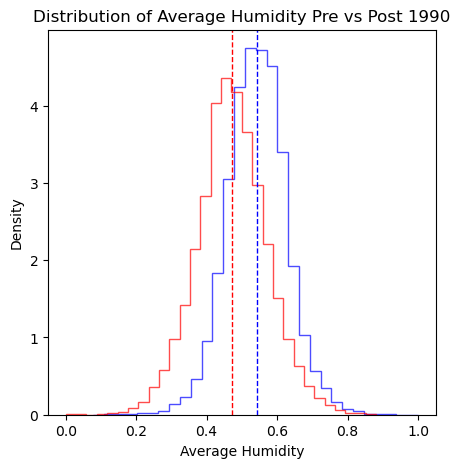

In [34]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Hurs']
post_1990_data = df[df['Class'] == 'post_1990']['Hurs']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)
print(f'Mean pre 1990: {mean_pre:.3f}')
print(f'Mean post 1990: {mean_post:.3f}')

plt.figure(figsize=(5, 5))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Humidity pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Humidity post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Humidity Pre vs Post 1990')
plt.xlabel('Average Humidity')
plt.ylabel('Density')

plt.show()

Mean pre 1990: 0.573
Mean post 1990: 0.493


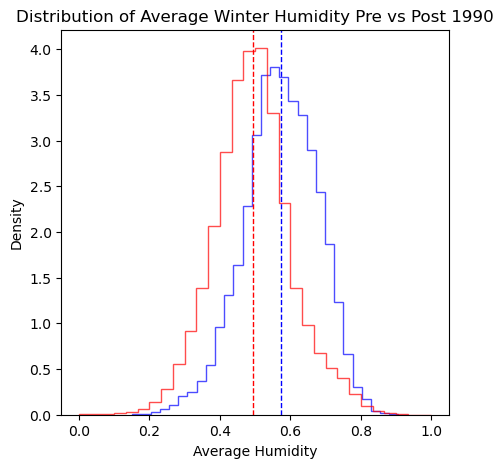

In [35]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Winter Hurs']
post_1990_data = df[df['Class'] == 'post_1990']['Winter Hurs']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)
print(f'Mean pre 1990: {mean_pre:.3f}')
print(f'Mean post 1990: {mean_post:.3f}')

plt.figure(figsize=(5, 5))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Humidity pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Humidity post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Winter Humidity Pre vs Post 1990')
plt.xlabel('Average Humidity')
plt.ylabel('Density')

plt.show()

Mean pre 1990: 0.594
Mean post 1990: 0.530


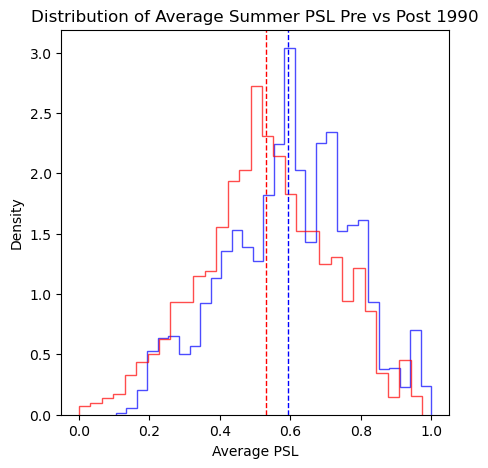

In [37]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Summer Psl']
post_1990_data = df[df['Class'] == 'post_1990']['Summer Psl']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)
print(f'Mean pre 1990: {mean_pre:.3f}')
print(f'Mean post 1990: {mean_post:.3f}')

plt.figure(figsize=(5, 5))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Humidity pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Humidity post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Summer PSL Pre vs Post 1990')
plt.xlabel('Average PSL')
plt.ylabel('Density')

plt.show()

Mean pre 1990: 0.386
Mean post 1990: 0.443


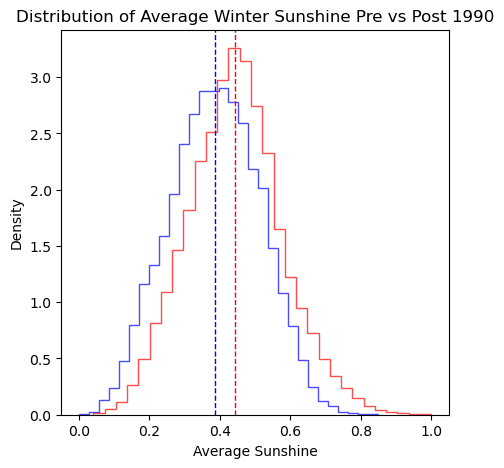

In [38]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Winter Sun']
post_1990_data = df[df['Class'] == 'post_1990']['Winter Sun']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)
print(f'Mean pre 1990: {mean_pre:.3f}')
print(f'Mean post 1990: {mean_post:.3f}')

plt.figure(figsize=(5, 5))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Humidity pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Humidity post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Winter Sunshine Pre vs Post 1990')
plt.xlabel('Average Sunshine')
plt.ylabel('Density')

plt.show()

Mean pre 1990: 0.576
Mean post 1990: 0.632


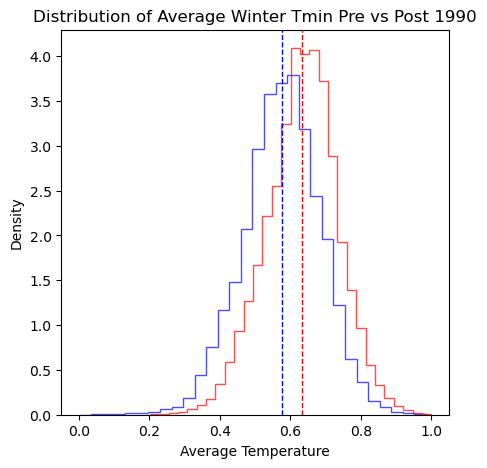

In [39]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Winter Tmin']
post_1990_data = df[df['Class'] == 'post_1990']['Winter Tmin']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)
print(f'Mean pre 1990: {mean_pre:.3f}')
print(f'Mean post 1990: {mean_post:.3f}')

plt.figure(figsize=(5, 5))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Humidity pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Humidity post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Winter Tmin Pre vs Post 1990')
plt.xlabel('Average Temperature')
plt.ylabel('Density')

plt.show()